# Melanoma Skin Cancer Image Classification

## Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

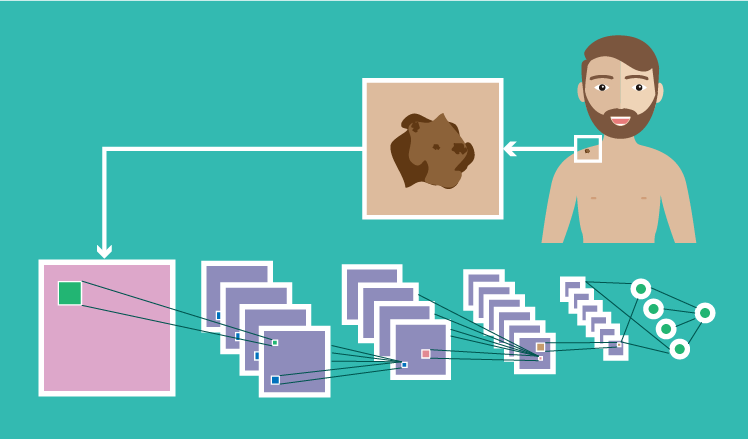

## Importing Libraries 

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

2024-02-02 11:31:58.263724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 11:31:58.528156: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 11:31:59.196486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.3/lib:
2024-02-02 11:31:59.196549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvi

## Loading Data

In [2]:
train_dir = 'data/Train'
test_dir = 'data/Test'
batch_size = 32
image_size = (180, 180)

## Spliting into train and validation

In [3]:
# Dataset Creation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


## Data Visualization

In [5]:
# Dataset Visualization
def visualize_dataset_sample(generator, class_labels):
    # Display one instance of each class
    for i in range(len(class_labels)):
        class_label = class_labels[i]
        plt.figure(figsize=(5, 5))
        
        # Find an image from the generator for the current class
        for x_batch, y_batch in generator:
            class_indices = tf.argmax(y_batch, axis=1)
            idx = tf.where(class_indices == i).numpy()
            if len(idx) > 0:
                image = x_batch[idx[0][0]]
                break
        
        # Display the image
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
        plt.show()

2024-02-02 11:32:00.749941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-02 11:32:00.753979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-02 11:32:00.754124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-02 11:32:00.755726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

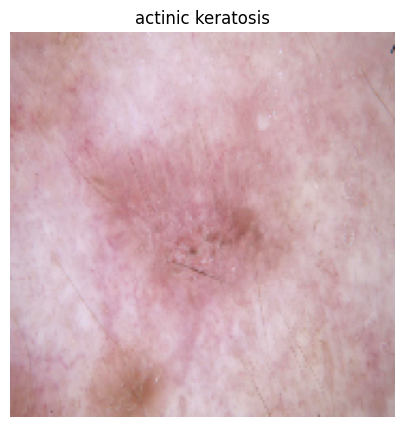

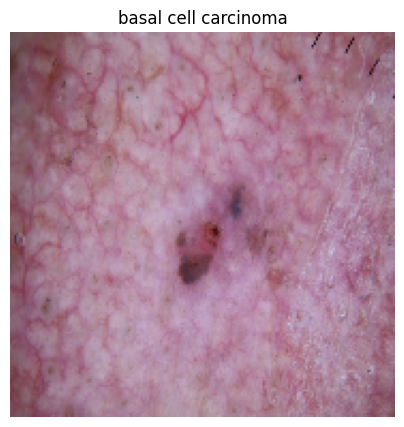

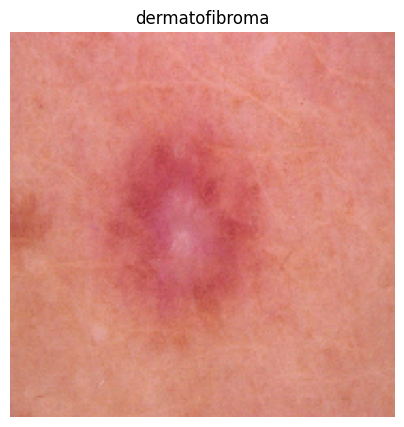

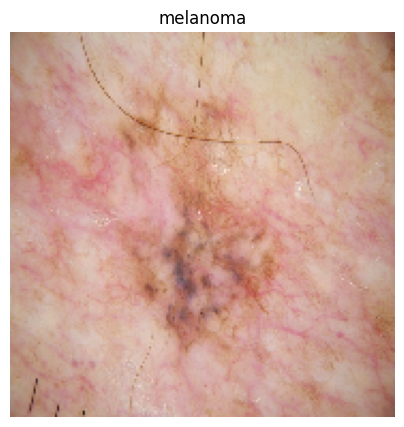

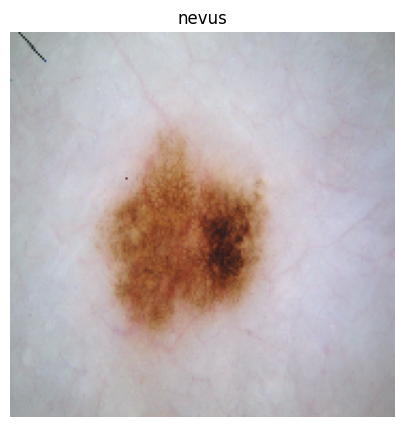

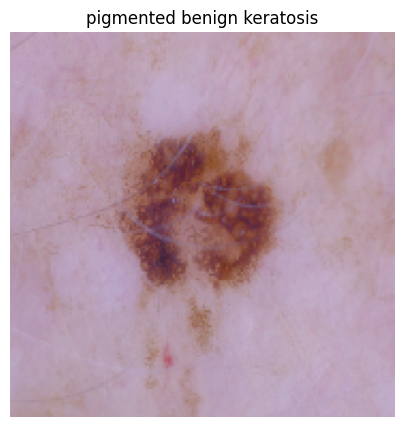

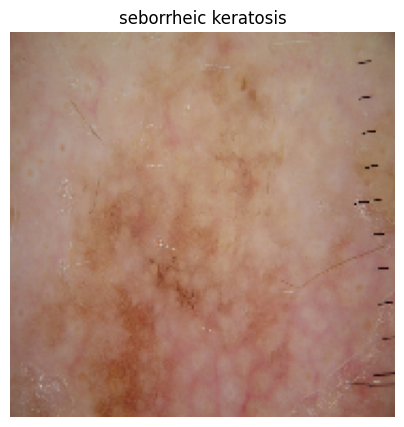

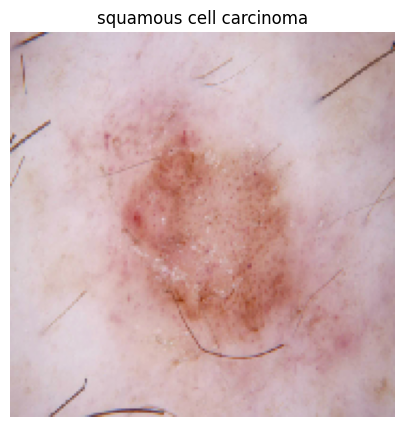

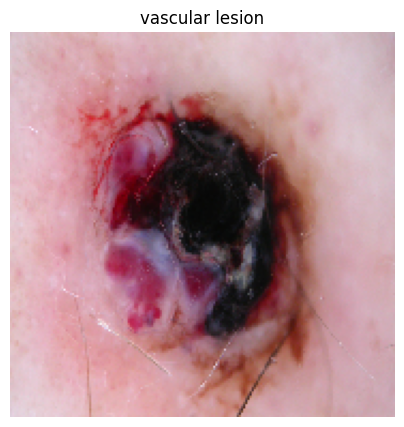

In [6]:
# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Visualize one instance of each class
visualize_dataset_sample(train_generator, class_labels)

## Model Building

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(256,(3,3),input_shape=(180,180,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(9,activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [8]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss = 'categorical_crossentropy', optimizer =adam, metrics = ["acc"])

In [9]:
model.fit(train_generator,epochs = 20,batch_size = batch_size,shuffle = False,validation_data=validation_generator)


Epoch 1/20


2024-02-02 11:32:05.685287: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2024-02-02 11:32:06.547291: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2024-02-02 11:32:06.548496: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2024-02-02 11:32:06.548510: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-02-02 11:32:06.548550: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

57/57 [==============================] - 22s 284ms/step - loss: 2.1041 - acc: 0.1944 - val_loss: 2.0662 - val_acc: 0.3018
Epoch 2/20
57/57 [==============================] - 15s 263ms/step - loss: 2.0632 - acc: 0.2295 - val_loss: 2.0013 - val_acc: 0.2387
Epoch 3/20
57/57 [==============================] - 15s 269ms/step - loss: 1.9692 - acc: 0.3014 - val_loss: 1.9686 - val_acc: 0.3041
Epoch 4/20
57/57 [==============================] - 15s 260ms/step - loss: 1.9318 - acc: 0.3142 - val_loss: 1.9032 - val_acc: 0.3108
Epoch 5/20
57/57 [==============================] - 15s 258ms/step - loss: 1.8568 - acc: 0.3387 - val_loss: 1.9745 - val_acc: 0.2410
Epoch 6/20
57/57 [==============================] - 15s 262ms/step - loss: 1.8338 - acc: 0.3571 - val_loss: 1.8886 - val_acc: 0.2815
Epoch 7/20
57/57 [==============================] - 15s 263ms/step - loss: 1.8042 - acc: 0.3705 - val_loss: 1.9540 - val_acc: 0.2387
Epoch 8/20
57/57 [==============================] - 15s 264ms/step - loss: 1.742

## Observations:
The data set has very less number of images, training on that data for 20 epochs we got a training accuracyof 48 and testing accuracy of 47. We can clearly see the model is underfitting.

## Data Augmentation

In [10]:
# Dataset Creation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


## Model Building

In [11]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(512,(3,3),input_shape=(180,180,3),activation="relu",padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(9,activation="softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 512)     14336     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 512)      0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 512)      2048      
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 256)       1179904   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 256)      0         
 2D)                                                             
                                                      

In [12]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss = 'categorical_crossentropy', optimizer =adam, metrics = ["acc"])

In [13]:
model.fit(train_generator,epochs = 20,batch_size = batch_size,shuffle = False,validation_data=validation_generator)

Epoch 1/20
57/57 [==============================] - 63s 673ms/step - loss: 1.9067 - acc: 0.3337 - val_loss: 2.1773 - val_acc: 0.2005
Epoch 2/20
57/57 [==============================] - 36s 636ms/step - loss: 1.6005 - acc: 0.4451 - val_loss: 2.1764 - val_acc: 0.1149
Epoch 3/20
57/57 [==============================] - 35s 613ms/step - loss: 1.5202 - acc: 0.4813 - val_loss: 2.1182 - val_acc: 0.2860
Epoch 4/20
57/57 [==============================] - 35s 608ms/step - loss: 1.4452 - acc: 0.5003 - val_loss: 2.0652 - val_acc: 0.3423
Epoch 5/20
57/57 [==============================] - 35s 608ms/step - loss: 1.3863 - acc: 0.5315 - val_loss: 1.9528 - val_acc: 0.4054
Epoch 6/20
57/57 [==============================] - 35s 606ms/step - loss: 1.3834 - acc: 0.5259 - val_loss: 1.8757 - val_acc: 0.4302
Epoch 7/20
57/57 [==============================] - 35s 607ms/step - loss: 1.3076 - acc: 0.5415 - val_loss: 1.8322 - val_acc: 0.3806
Epoch 8/20
57/57 [==============================] - 35s 611ms/step - 

## Observations:
The data set has very less number of images, training on that data for 20 epochs we got a training accuracyof 59 and testing accuracy of 47. We can clearly see the model is underfitting augmenting the data doesnot solved the problem.

## Re-sampling the data

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from collections import Counter

In [18]:
img_width, img_height = 180, 180
batch_size = 32
epochs=30
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [19]:
# Flow from directory using the original data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Change this to 'categorical' for more than two classes
)


Found 2239 images belonging to 9 classes.


In [20]:
# Get the entire dataset from the generator
num_samples = len(train_generator)
X_train, y_train = [], []


In [21]:
for i in range(num_samples):
    batch = next(train_generator)
    X_train.append(batch[0])
    y_train.append(batch[1])

# Convert the lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.vstack(y_train)


In [22]:
# Print the number of images before resampling class-wise
before_resampling_counter = Counter(np.argmax(y_train, axis=1))
print("Number of images before resampling (class-wise):", before_resampling_counter)


Number of images before resampling (class-wise): Counter({5: 462, 3: 438, 1: 376, 4: 357, 7: 181, 8: 139, 0: 114, 2: 95, 6: 77})


## Observations:
We can observe that the data is imbalanced, the following are the detais of each class,

Class 0(actinic keratosis):- 114 images

Class 1(basal cell carcinoma):- 376 images

Class 2(dermatofibroma):- 95 images

Class 3(melanoma):- 438 images

Class 4(nevus):- 357 images

Class 5(pigmented benign keratosis):- 462 images

Class 6(seborrheic keratosis):- 77 images

Class 7(squamous cell carcinoma):- 181 images

Class 8(vascular lesion):- 139 images

Here Class 5(pigmented benign keratosis) has the height images of 462 and class 6(seborrheic keratosis) has the lowest of 77 images in them.

In [23]:
# Apply SMOTE to the feature matrices and labels
smt = SMOTE()
X_train_resampled, y_train_resampled = smt.fit_resample(X_train.reshape((-1, img_width * img_height * 3)), y_train)
X_train_resampled = X_train_resampled.reshape((-1, img_width, img_height, 3))

In [24]:
after_resampling_counter = Counter(np.argmax(y_train_resampled, axis=1))
print("Number of images after resampling (class-wise):", after_resampling_counter)

Number of images after resampling (class-wise): Counter({5: 462, 3: 462, 1: 462, 0: 462, 2: 462, 8: 462, 6: 462, 4: 462, 7: 462})


## Observations:
After sampling all the classes has 462 images in them.

## Data augmentation

In [25]:
# # Convert labels back to categorical
# y_train_resampled_categorical = tf.keras.utils.to_categorical(y_train_resampled, num_classes=len(train_generator.class_indices))

# # Create a generator for the oversampled data
# smote_generator = train_datagen.flow(X_train_resampled_images, y_train_resampled_categorical, batch_size=batch_size)

train_datagen = ImageDataGenerator(
                                   validation_split=0.1,
                                   rotation_range=20,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                #    vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(
    X_train_resampled, y_train_resampled,
    batch_size=batch_size,
    subset='training'
)

validation_generator = train_datagen.flow(
    X_train_resampled, y_train_resampled,
    batch_size=batch_size,
    subset='validation'
)


In [26]:
# Calculate the total number of images generated during training
total_images_generated = len(train_generator) * epochs * batch_size
print("Total number of images generated during training:", total_images_generated)

# Get a batch from the generator
sample_batch = next(train_generator)

# Print the shape of the batch
print("Shape of the batch:", sample_batch[0].shape)  # Features
print("Shape of the labels:", sample_batch[1].shape)  # Labels


Total number of images generated during training: 112320
Shape of the batch: (32, 180, 180, 3)
Shape of the labels: (32, 9)


## Model Building

In [27]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=(180,180,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(512,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(1024,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(512,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu"))
# # model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
# # model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(512,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(9,activation="softmax"))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 89, 89, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 89, 89, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 87, 87, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 43, 43, 256)      0         
 2D)                                                             
                                                      

In [30]:
opm = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
   

model.compile(loss = 'categorical_crossentropy', optimizer =opm, metrics = ["acc"])

In [31]:
model.fit(train_generator,epochs = epochs,batch_size = batch_size,shuffle = False,validation_data=validation_generator)

Epoch 1/30
117/117 [==============================] - 50s 326ms/step - loss: 1.9625 - acc: 0.3027 - val_loss: 2.2431 - val_acc: 0.0337
Epoch 2/30
117/117 [==============================] - 27s 229ms/step - loss: 1.6042 - acc: 0.4865 - val_loss: 2.4110 - val_acc: 0.0361
Epoch 3/30
117/117 [==============================] - 27s 229ms/step - loss: 1.3915 - acc: 0.5613 - val_loss: 2.4776 - val_acc: 0.0554
Epoch 4/30
117/117 [==============================] - 27s 233ms/step - loss: 1.2339 - acc: 0.6252 - val_loss: 2.3059 - val_acc: 0.2024
Epoch 5/30
117/117 [==============================] - 27s 230ms/step - loss: 1.0922 - acc: 0.6551 - val_loss: 1.8724 - val_acc: 0.3181
Epoch 6/30
117/117 [==============================] - 27s 230ms/step - loss: 0.9888 - acc: 0.6853 - val_loss: 1.3432 - val_acc: 0.5084
Epoch 7/30
117/117 [==============================] - 27s 228ms/step - loss: 0.9050 - acc: 0.7109 - val_loss: 1.1579 - val_acc: 0.5928
Epoch 8/30
117/117 [==============================] - 2

## Observations:
Training on the new data for 30 epochs we got a training accuracy of 89 and testing accuracy of 73. Compaired to the previous models this model do perform better, Even after resampling and augmentation the data is less, by increasing the dataset we can improve the model performance even better.